In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report


In [11]:
df = pd.read_csv("test.csv", encoding="latin1")
df

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0
...,...,...,...,...,...,...,...,...,...
4810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df = df[["text", "sentiment"]].dropna()

df.head()

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive


In [15]:
df["sentiment"] = df["sentiment"].map({
    "negative": 0,
    "neutral": 1,
    "positive": 2
})

X = df["text"]
y = df["sentiment"]


In [17]:
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_vec = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, test_size=0.2, random_state=42
)


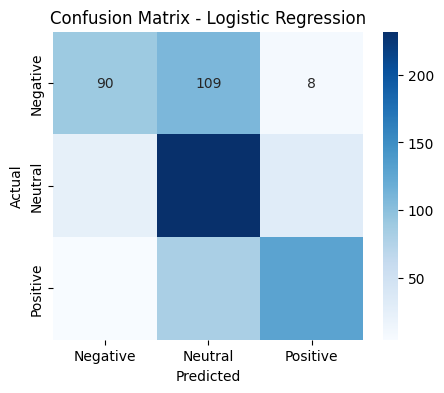

In [19]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm_log, annot=True, fmt="d", cmap="Blues",
    xticklabels=["Negative","Neutral","Positive"],
    yticklabels=["Negative","Neutral","Positive"]
)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [21]:
print("Classification Report - Logistic Regression")
print(classification_report(y_test, y_pred_log,
      target_names=["Negative","Neutral","Positive"]))


Classification Report - Logistic Regression
              precision    recall  f1-score   support

    Negative       0.76      0.43      0.55       207
     Neutral       0.55      0.81      0.66       286
    Positive       0.77      0.60      0.68       214

    accuracy                           0.64       707
   macro avg       0.69      0.62      0.63       707
weighted avg       0.68      0.64      0.63       707



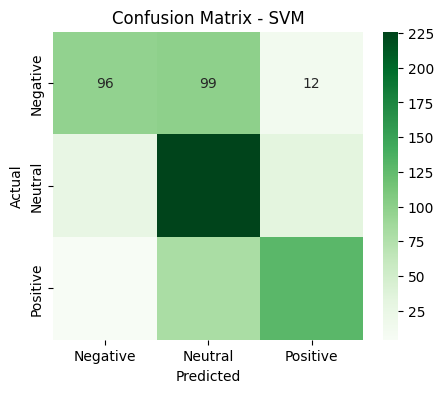

In [23]:
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm_svm, annot=True, fmt="d", cmap="Greens",
    xticklabels=["Negative","Neutral","Positive"],
    yticklabels=["Negative","Neutral","Positive"]
)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [25]:
print("Classification Report - SVM")
print(classification_report(y_test, y_pred_svm,
      target_names=["Negative","Neutral","Positive"]))


Classification Report - SVM
              precision    recall  f1-score   support

    Negative       0.76      0.46      0.57       207
     Neutral       0.56      0.79      0.65       286
    Positive       0.74      0.60      0.66       214

    accuracy                           0.64       707
   macro avg       0.68      0.62      0.63       707
weighted avg       0.67      0.64      0.63       707



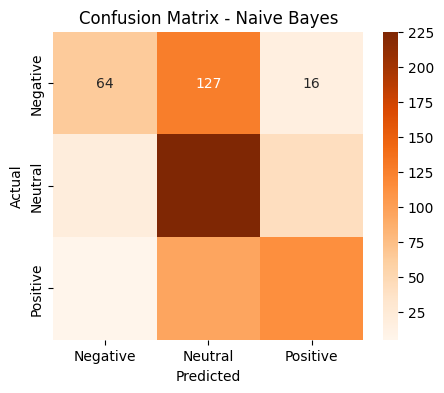

In [27]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

cm_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm_nb, annot=True, fmt="d", cmap="Oranges",
    xticklabels=["Negative","Neutral","Positive"],
    yticklabels=["Negative","Neutral","Positive"]
)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [30]:
print("Classification Report - Naive Bayes")
print(classification_report(y_test, y_pred_nb,
      target_names=["Negative","Neutral","Positive"]))


Classification Report - Naive Bayes
              precision    recall  f1-score   support

    Negative       0.73      0.31      0.43       207
     Neutral       0.50      0.79      0.61       286
    Positive       0.66      0.53      0.59       214

    accuracy                           0.57       707
   macro avg       0.63      0.54      0.55       707
weighted avg       0.62      0.57      0.55       707



In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

models = {
    "Logistic Regression": y_pred_log,
    "SVM": y_pred_svm,
    "Naive Bayes": y_pred_nb
}

accuracy, precision, recall = [], [], []

for preds in models.values():
    accuracy.append(accuracy_score(y_test, preds))
    precision.append(precision_score(y_test, preds, average="macro"))
    recall.append(recall_score(y_test, preds, average="macro"))


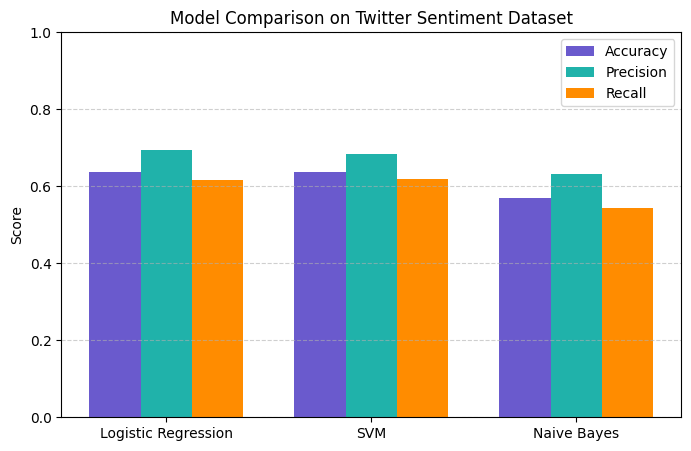

In [34]:
labels = list(models.keys())
x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(8,5))

plt.bar(x - width, accuracy, width, label="Accuracy", color="#6A5ACD")
plt.bar(x, precision, width, label="Precision", color="#20B2AA")
plt.bar(x + width, recall, width, label="Recall", color="#FF8C00")

plt.xticks(x, labels)
plt.ylabel("Score")
plt.title("Model Comparison on Twitter Sentiment Dataset")
plt.ylim(0,1)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()


### SVM is the best performing model, followed by Logistic Regression, while Naive Bayes shows lower performance on this dataset.